In [1]:
import pandas as pd
import numpy as np
import modeltest as deep
import experiment as exp
import myutil as util
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
import importlib
importlib.reload(deep)
importlib.reload(exp)

<module 'experiment' from 'c:\\Users\\kyeongtaek\\generative_model\\veichle\\experiment.py'>

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7752708035037910631
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5724176384
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7064754081173155142
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [2]:
#파일 읽기
filepath_german_csv = 'xamain.csv'
d_german_df = pd.read_csv(filepath_german_csv)

#numpy 변환
d_german_np = np.array(d_german_df)

# sample 수, 특징 수 등 계산
n_row = d_german_np.shape[0]
n_features = d_german_np.shape[1]-1

# 입력과 출력 데이터 분리
x = d_german_np[:, :n_features]
y = d_german_np[:, n_features]

#정규화
x_norm = (x - np.min(x,0))/ (np.max(x,0) - np.min(x,0))
y_norm = (y - np.min(y,0))/ (np.max(y,0) - np.min(y,0))

Triplet Loss

In [3]:
import tensorflow_addons as tfa

C:\Users\kyeongtaek\anaconda3\envs\tensor\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/500
43/43 [==============================] - 1s 17ms/step - loss: 0.3934 - val_loss: 0.9012
Epoch 2/500
43/43 [==============================] - 0s 10ms/step - loss: 0.2631 - val_loss: 0.8566
Epoch 3/500
43/43 [==============================] - 0s 7ms/step - loss: 0.1723 - val_loss: 0.8393
Epoch 4/500
43/43 [==============================] - 0s 8ms/step - loss: 0.1383 - val_loss: 0.7437
Epoch 5/500
43/43 [==============================] - 0s 7ms/step - loss: 0.1268 - val_loss: 0.6556
Epoch 6/500
43/43 [==============================] - 0s 7ms/step - loss: 0.1126 - val_loss: 0.5733
Epoch 7/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0968 - val_loss: 0.4947
Epoch 8/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0939 - val_loss: 0.4062
Epoch 9/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0874 - val_loss: 0.3144
Epoch 10/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0791 - val_loss: 0.2510
Epoch 1

Epoch 83/500
43/43 [==============================] - 0s 8ms/step - loss: 0.0411 - val_loss: 0.0500
Epoch 84/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0368 - val_loss: 0.0351
Epoch 85/500
43/43 [==============================] - 0s 8ms/step - loss: 0.0435 - val_loss: 0.0597
Epoch 86/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0431 - val_loss: 0.0516
Epoch 87/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0427 - val_loss: 0.0595
Epoch 88/500
43/43 [==============================] - 0s 8ms/step - loss: 0.0378 - val_loss: 0.0559
Epoch 89/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0864 - val_loss: 0.0565
Epoch 90/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0471 - val_loss: 0.0619
Epoch 91/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0474 - val_loss: 0.0592
Epoch 92/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0450 - val_loss: 0.0466


43/43 [==============================] - 0s 7ms/step - loss: 0.0275 - val_loss: 0.0444
Epoch 246/500
43/43 [==============================] - 0s 8ms/step - loss: 0.0278 - val_loss: 0.0369
Epoch 247/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0262 - val_loss: 0.0532
Epoch 248/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0257 - val_loss: 0.1009
Epoch 249/500
43/43 [==============================] - 0s 8ms/step - loss: 0.0308 - val_loss: 0.0445
Epoch 250/500
43/43 [==============================] - 0s 8ms/step - loss: 0.0248 - val_loss: 0.0501
Epoch 251/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0274 - val_loss: 0.0619
Epoch 252/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0219 - val_loss: 0.0450
Epoch 253/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0240 - val_loss: 0.0431
Epoch 254/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0211 - val_loss: 0.0401
Epoc

43/43 [==============================] - 0s 7ms/step - loss: 0.0315 - val_loss: 0.0432
Epoch 408/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0239 - val_loss: 0.0414
Epoch 409/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0272 - val_loss: 0.0472
Epoch 410/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0203 - val_loss: 0.0452
Epoch 411/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0229 - val_loss: 0.0531
Epoch 412/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0526 - val_loss: 0.0448
Epoch 413/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0293 - val_loss: 0.0481
Epoch 414/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0295 - val_loss: 0.0458
Epoch 415/500
43/43 [==============================] - 0s 8ms/step - loss: 0.0180 - val_loss: 0.0505
Epoch 416/500
43/43 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.0569
Epoc

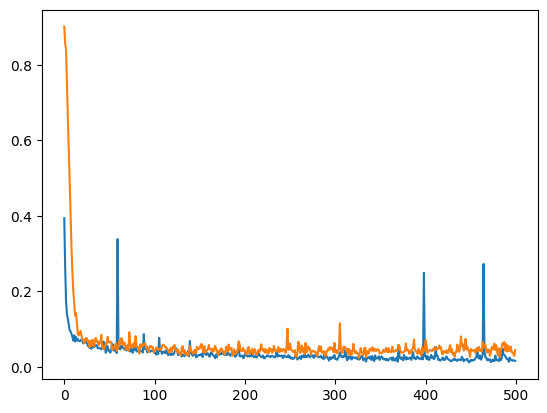

In [10]:
# 10fold validation 수행여부
bTenFoldValidation = False
if not bTenFoldValidation:  # 학습 & 테스트를 1회만 수행하는 경우
    # 데이터 분할
    [x_train, x_val, x_test, y_train, y_val, y_test] = exp.split_data(x_norm, y, test_ratio=0.0, val_ratio=0.2)

    # 모델 불러오기 & 컴파일
    g = deep.encoder(x.shape[1:])
        
    g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

    hist = g.fit(x_train, y_train, epochs=500, batch_size = 16, validation_data=(x_val, y_val))
    # 결과 출력

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.show()

else:  # N fold Validation
    idx = np.array(range(n_row))
    np.random.shuffle(idx)  # 데이터 인덱스 섞기

    N = 10
    total = 0
    nClass = 2
    cm = np.zeros([N, nClass, nClass])
    for i in range(N):
        # Train/Test 데이터 분할
        [x_train, x_test, y_train, y_test] = exp.split_data_for_N_fold_validation(x_norm, y, fold=N, idx=i)

        # 모델 불러오기 & 컴파일
        g = deep.encoder(x.shape[1:])
        
        g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

        # 학습
        hist = g.fit(x_train, y_train, epochs=2000, batch_size = 256, validation_data=(x_test, y_test))
        
        plt.plot(hist.history['loss'])
    #plt.plot(result.val_acc)
        plt.show()


Triplet Loss 전이학습

Epoch 1/500
48/48 [==============================] - 7s 15ms/step - loss: 0.7477 - val_loss: 0.9805
Epoch 2/500
48/48 [==============================] - 0s 7ms/step - loss: 0.6573 - val_loss: 0.9797
Epoch 3/500
48/48 [==============================] - 0s 8ms/step - loss: 0.2652 - val_loss: 0.9131
Epoch 4/500
48/48 [==============================] - 0s 7ms/step - loss: 0.2104 - val_loss: 0.7439
Epoch 5/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1429 - val_loss: 0.6156
Epoch 6/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1230 - val_loss: 0.4920
Epoch 7/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1186 - val_loss: 0.3664
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1061 - val_loss: 0.2728
Epoch 9/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0952 - val_loss: 0.2019
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1033 - val_loss: 0.1880
Epoch 11

48/48 [==============================] - 0s 8ms/step - loss: 0.0486 - val_loss: 0.0301
Epoch 84/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0412 - val_loss: 0.0396
Epoch 85/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0336 - val_loss: 0.0308
Epoch 86/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0381 - val_loss: 0.0495
Epoch 87/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0354 - val_loss: 0.0525
Epoch 88/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0510 - val_loss: 0.0408
Epoch 89/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0455 - val_loss: 0.0425
Epoch 90/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0415 - val_loss: 0.0444
Epoch 91/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0398 - val_loss: 0.0497
Epoch 92/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0428 - val_loss: 0.0266
Epoch 93/500


48/48 [==============================] - 0s 7ms/step - loss: 0.0286 - val_loss: 0.0339
Epoch 246/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0291 - val_loss: 0.0273
Epoch 247/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0313 - val_loss: 0.0390
Epoch 248/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0234 - val_loss: 0.0191
Epoch 249/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0308 - val_loss: 0.0316
Epoch 250/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0268 - val_loss: 0.0382
Epoch 251/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0284 - val_loss: 0.0316
Epoch 252/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0276 - val_loss: 0.0384
Epoch 253/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0291 - val_loss: 0.0203
Epoch 254/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0327
Epoc

48/48 [==============================] - 0s 7ms/step - loss: 0.0258 - val_loss: 0.0331
Epoch 408/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0234 - val_loss: 0.0335
Epoch 409/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0148 - val_loss: 0.0290
Epoch 410/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0189 - val_loss: 0.0372
Epoch 411/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0218 - val_loss: 0.0286
Epoch 412/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0179 - val_loss: 0.0217
Epoch 413/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0227 - val_loss: 0.0333
Epoch 414/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0213 - val_loss: 0.0503
Epoch 415/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0300 - val_loss: 0.0348
Epoch 416/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0565
Epoc

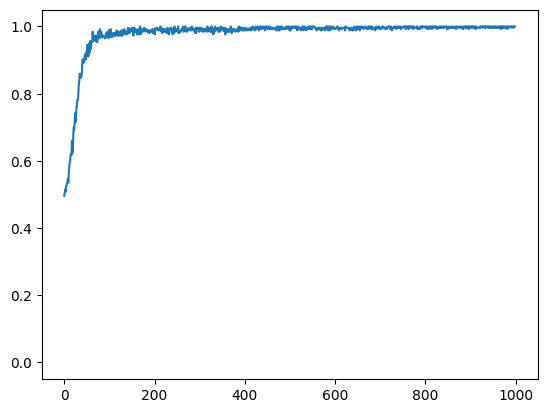

Epoch 1/500
48/48 [==============================] - 1s 12ms/step - loss: 0.6137 - val_loss: 0.9281
Epoch 2/500
48/48 [==============================] - 0s 8ms/step - loss: 0.2614 - val_loss: 0.8816
Epoch 3/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1886 - val_loss: 0.7920
Epoch 4/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1350 - val_loss: 0.7204
Epoch 5/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1334 - val_loss: 0.6152
Epoch 6/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0953 - val_loss: 0.4743
Epoch 7/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0941 - val_loss: 0.3249
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1001 - val_loss: 0.3020
Epoch 9/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0933 - val_loss: 0.2414
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1003 - val_loss: 0.1576
Epoch 11

48/48 [==============================] - 0s 7ms/step - loss: 0.0322 - val_loss: 0.0156
Epoch 84/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.0269
Epoch 85/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0344 - val_loss: 0.0547
Epoch 86/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0348 - val_loss: 0.0248
Epoch 87/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0356 - val_loss: 0.0360
Epoch 88/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0325 - val_loss: 0.0247
Epoch 89/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0393 - val_loss: 0.0371
Epoch 90/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0326 - val_loss: 0.0327
Epoch 91/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0326 - val_loss: 0.0293
Epoch 92/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0352 - val_loss: 0.0244
Epoch 93/500


48/48 [==============================] - 0s 7ms/step - loss: 0.0250 - val_loss: 0.0346
Epoch 246/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0235 - val_loss: 0.0469
Epoch 247/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0278 - val_loss: 0.0412
Epoch 248/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0280 - val_loss: 0.0377
Epoch 249/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0254 - val_loss: 0.0513
Epoch 250/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0234 - val_loss: 0.0363
Epoch 251/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0192 - val_loss: 0.0348
Epoch 252/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0198 - val_loss: 0.0322
Epoch 253/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0296 - val_loss: 0.0386
Epoch 254/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0270 - val_loss: 0.0416
Epoc

48/48 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.0199
Epoch 408/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0176 - val_loss: 0.0343
Epoch 409/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0182 - val_loss: 0.0391
Epoch 410/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0155 - val_loss: 0.0385
Epoch 411/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0217 - val_loss: 0.0376
Epoch 412/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0198 - val_loss: 0.0221
Epoch 413/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0236 - val_loss: 0.0467
Epoch 414/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0283 - val_loss: 0.0454
Epoch 415/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.0319
Epoch 416/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0180 - val_loss: 0.0359
Epoc

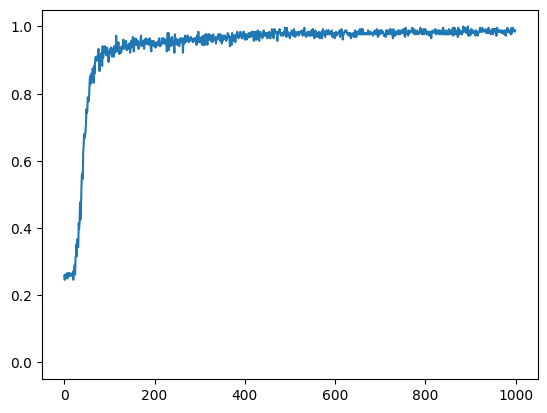

Epoch 1/500
48/48 [==============================] - 1s 10ms/step - loss: 0.5099 - val_loss: 0.9405
Epoch 2/500
48/48 [==============================] - 0s 8ms/step - loss: 0.2675 - val_loss: 0.8955
Epoch 3/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1835 - val_loss: 0.8312
Epoch 4/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1616 - val_loss: 0.7788
Epoch 5/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1344 - val_loss: 0.6717
Epoch 6/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1306 - val_loss: 0.5769
Epoch 7/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1174 - val_loss: 0.4487
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1093 - val_loss: 0.4025
Epoch 9/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1083 - val_loss: 0.3027
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1083 - val_loss: 0.2468
Epoch 11

48/48 [==============================] - 0s 7ms/step - loss: 0.0404 - val_loss: 0.0342
Epoch 84/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0450 - val_loss: 0.0393
Epoch 85/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0462 - val_loss: 0.0304
Epoch 86/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0481 - val_loss: 0.0376
Epoch 87/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0506 - val_loss: 0.0470
Epoch 88/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0457 - val_loss: 0.0197
Epoch 89/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0367 - val_loss: 0.0182
Epoch 90/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0419 - val_loss: 0.0400
Epoch 91/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0441 - val_loss: 0.0272
Epoch 92/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0462 - val_loss: 0.0316
Epoch 93/500


48/48 [==============================] - 0s 7ms/step - loss: 0.0335 - val_loss: 0.0317
Epoch 246/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0265 - val_loss: 0.0267
Epoch 247/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0258 - val_loss: 0.0454
Epoch 248/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0267 - val_loss: 0.0295
Epoch 249/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0284 - val_loss: 0.0362
Epoch 250/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0315 - val_loss: 0.0350
Epoch 251/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0303 - val_loss: 0.0284
Epoch 252/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0277 - val_loss: 0.0275
Epoch 253/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0232 - val_loss: 0.0232
Epoch 254/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0228 - val_loss: 0.0284
Epoc

48/48 [==============================] - 0s 7ms/step - loss: 0.0126 - val_loss: 0.0405
Epoch 408/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0222 - val_loss: 0.0289
Epoch 409/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0205 - val_loss: 0.0320
Epoch 410/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0213 - val_loss: 0.0266
Epoch 411/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0218 - val_loss: 0.0368
Epoch 412/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0229 - val_loss: 0.0281
Epoch 413/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0213 - val_loss: 0.0448
Epoch 414/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.0459
Epoch 415/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0205 - val_loss: 0.0417
Epoch 416/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.0465
Epoc

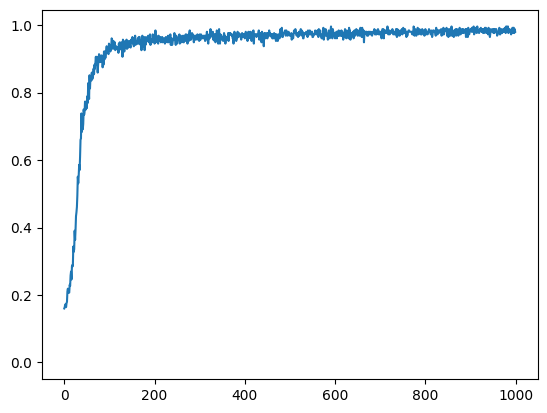

Epoch 1/500
48/48 [==============================] - 1s 10ms/step - loss: 0.9800 - val_loss: 0.9437
Epoch 2/500
48/48 [==============================] - 0s 8ms/step - loss: 0.4488 - val_loss: 0.9460
Epoch 3/500
48/48 [==============================] - 0s 8ms/step - loss: 0.2645 - val_loss: 0.8760
Epoch 4/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1978 - val_loss: 0.7780
Epoch 5/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1513 - val_loss: 0.5835
Epoch 6/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1230 - val_loss: 0.4376
Epoch 7/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1078 - val_loss: 0.3530
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1110 - val_loss: 0.2088
Epoch 9/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0955 - val_loss: 0.1803
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0907 - val_loss: 0.1346
Epoch 11

48/48 [==============================] - 0s 7ms/step - loss: 0.0481 - val_loss: 0.0791
Epoch 84/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0441 - val_loss: 0.0237
Epoch 85/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0409 - val_loss: 0.0420
Epoch 86/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0336 - val_loss: 0.0152
Epoch 87/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0342 - val_loss: 0.0213
Epoch 88/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0368 - val_loss: 0.0348
Epoch 89/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0420 - val_loss: 0.0206
Epoch 90/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0336 - val_loss: 0.0238
Epoch 91/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0343 - val_loss: 0.0169
Epoch 92/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0352 - val_loss: 0.0344
Epoch 93/500


48/48 [==============================] - 0s 7ms/step - loss: 0.0327 - val_loss: 0.0231
Epoch 246/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0295 - val_loss: 0.0141
Epoch 247/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0380 - val_loss: 0.0104
Epoch 248/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0323 - val_loss: 0.0116
Epoch 249/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.0128
Epoch 250/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0295 - val_loss: 0.0323
Epoch 251/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0241 - val_loss: 0.0249
Epoch 252/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0324 - val_loss: 0.0156
Epoch 253/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0337 - val_loss: 0.0374
Epoch 254/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0112
Epoc

48/48 [==============================] - 0s 7ms/step - loss: 0.0215 - val_loss: 0.0310
Epoch 408/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0258 - val_loss: 0.0235
Epoch 409/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0254 - val_loss: 0.0207
Epoch 410/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0208 - val_loss: 0.0303
Epoch 411/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0219 - val_loss: 0.0192
Epoch 412/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0226 - val_loss: 0.0250
Epoch 413/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0214 - val_loss: 0.0343
Epoch 414/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0215 - val_loss: 0.0212
Epoch 415/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0192 - val_loss: 0.0176
Epoch 416/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0292 - val_loss: 0.0202
Epoc

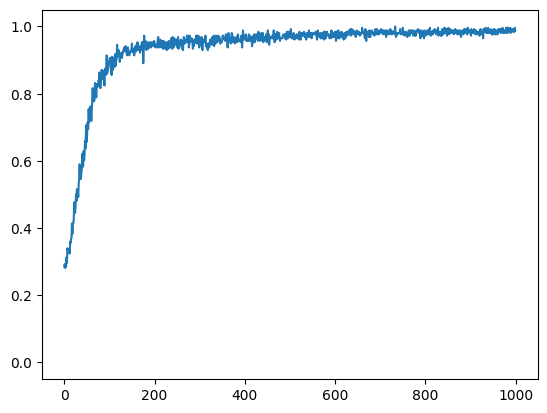

Epoch 1/500
48/48 [==============================] - 1s 10ms/step - loss: 0.3225 - val_loss: 0.9173
Epoch 2/500
48/48 [==============================] - 0s 8ms/step - loss: 0.2305 - val_loss: 0.8740
Epoch 3/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1652 - val_loss: 0.8091
Epoch 4/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1351 - val_loss: 0.6939
Epoch 5/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1111 - val_loss: 0.6237
Epoch 6/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1044 - val_loss: 0.5485
Epoch 7/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1002 - val_loss: 0.5151
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0917 - val_loss: 0.4417
Epoch 9/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0946 - val_loss: 0.2942
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0768 - val_loss: 0.2316
Epoch 11

48/48 [==============================] - 0s 8ms/step - loss: 0.0366 - val_loss: 0.0545
Epoch 84/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0424 - val_loss: 0.0588
Epoch 85/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0423 - val_loss: 0.0420
Epoch 86/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0289 - val_loss: 0.0324
Epoch 87/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0380 - val_loss: 0.0505
Epoch 88/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0383 - val_loss: 0.0392
Epoch 89/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0420 - val_loss: 0.0344
Epoch 90/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0353 - val_loss: 0.0401
Epoch 91/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0382 - val_loss: 0.0349
Epoch 92/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0404 - val_loss: 0.0522
Epoch 93/500


48/48 [==============================] - 0s 7ms/step - loss: 0.0264 - val_loss: 0.0419
Epoch 246/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0294 - val_loss: 0.0429
Epoch 247/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0259 - val_loss: 0.0230
Epoch 248/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0231 - val_loss: 0.0284
Epoch 249/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0275 - val_loss: 0.0290
Epoch 250/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0279 - val_loss: 0.0409
Epoch 251/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0231 - val_loss: 0.0434
Epoch 252/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0323 - val_loss: 0.0441
Epoch 253/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0353 - val_loss: 0.0460
Epoch 254/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0246 - val_loss: 0.0458
Epoc

48/48 [==============================] - 0s 7ms/step - loss: 0.0239 - val_loss: 0.0354
Epoch 408/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0187 - val_loss: 0.0555
Epoch 409/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0208 - val_loss: 0.0552
Epoch 410/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0199 - val_loss: 0.0492
Epoch 411/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.0278
Epoch 412/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0196 - val_loss: 0.0452
Epoch 413/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0171 - val_loss: 0.0530
Epoch 414/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0176 - val_loss: 0.0794
Epoch 415/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.0308
Epoch 416/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0185 - val_loss: 0.0526
Epoc

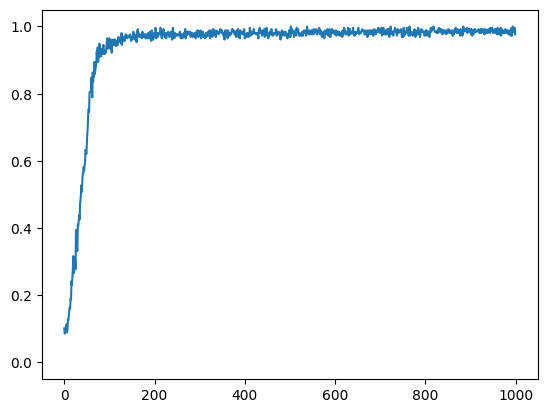

Epoch 1/500
48/48 [==============================] - 1s 10ms/step - loss: 0.4119 - val_loss: 0.9083
Epoch 2/500
48/48 [==============================] - 0s 7ms/step - loss: 0.2590 - val_loss: 0.8573
Epoch 3/500
48/48 [==============================] - 0s 7ms/step - loss: 0.2016 - val_loss: 0.7862
Epoch 4/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1476 - val_loss: 0.7538
Epoch 5/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1201 - val_loss: 0.6863
Epoch 6/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1164 - val_loss: 0.5971
Epoch 7/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1193 - val_loss: 0.5070
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0980 - val_loss: 0.4051
Epoch 9/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0960 - val_loss: 0.3790
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0871 - val_loss: 0.2935
Epoch 11

48/48 [==============================] - 0s 7ms/step - loss: 0.0374 - val_loss: 0.1564
Epoch 84/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0427 - val_loss: 0.1718
Epoch 85/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0351 - val_loss: 0.1539
Epoch 86/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0352 - val_loss: 0.1233
Epoch 87/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0389 - val_loss: 0.1473
Epoch 88/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0345 - val_loss: 0.1524
Epoch 89/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0380 - val_loss: 0.1290
Epoch 90/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0324 - val_loss: 0.2157
Epoch 91/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0346 - val_loss: 0.1311
Epoch 92/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0398 - val_loss: 0.2333
Epoch 93/500


48/48 [==============================] - 0s 7ms/step - loss: 0.0258 - val_loss: 0.1534
Epoch 246/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0242 - val_loss: 0.2426
Epoch 247/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0281 - val_loss: 0.1081
Epoch 248/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0270 - val_loss: 0.2255
Epoch 249/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0326 - val_loss: 0.1082
Epoch 250/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0313 - val_loss: 0.0791
Epoch 251/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0341 - val_loss: 0.1124
Epoch 252/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0322 - val_loss: 0.1899
Epoch 253/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0297 - val_loss: 0.1801
Epoch 254/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0265 - val_loss: 0.1267
Epoc

48/48 [==============================] - 0s 7ms/step - loss: 0.0206 - val_loss: 0.0796
Epoch 408/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0137 - val_loss: 0.1377
Epoch 409/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0207 - val_loss: 0.1295
Epoch 410/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0161 - val_loss: 0.1466
Epoch 411/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0187 - val_loss: 0.1386
Epoch 412/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0231 - val_loss: 0.0884
Epoch 413/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0226 - val_loss: 0.0903
Epoch 414/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0218 - val_loss: 0.0685
Epoch 415/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0219 - val_loss: 0.1511
Epoch 416/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0192 - val_loss: 0.1099
Epoc

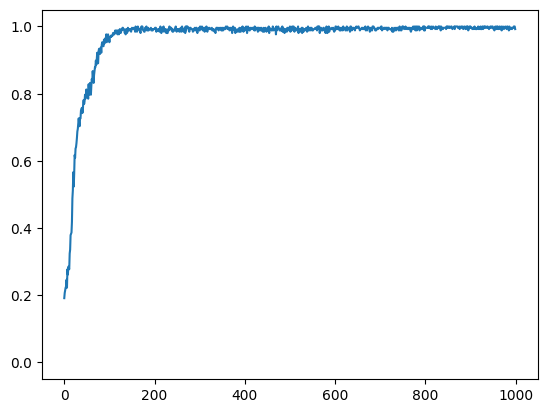

Epoch 1/500
48/48 [==============================] - 1s 10ms/step - loss: 0.3468 - val_loss: 0.9230
Epoch 2/500
48/48 [==============================] - 0s 8ms/step - loss: 0.2108 - val_loss: 0.8863
Epoch 3/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1678 - val_loss: 0.8241
Epoch 4/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1376 - val_loss: 0.7648
Epoch 5/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1262 - val_loss: 0.6776
Epoch 6/500
48/48 [==============================] - 0s 9ms/step - loss: 0.1101 - val_loss: 0.5794
Epoch 7/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1022 - val_loss: 0.5009
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0892 - val_loss: 0.4483
Epoch 9/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0843 - val_loss: 0.3028
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0810 - val_loss: 0.2599
Epoch 11

48/48 [==============================] - 0s 7ms/step - loss: 0.0373 - val_loss: 0.0834
Epoch 84/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0445 - val_loss: 0.0626
Epoch 85/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0493 - val_loss: 0.0450
Epoch 86/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0344 - val_loss: 0.0767
Epoch 87/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0333 - val_loss: 0.0496
Epoch 88/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0423 - val_loss: 0.0568
Epoch 89/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0299 - val_loss: 0.0415
Epoch 90/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0405 - val_loss: 0.0527
Epoch 91/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0515 - val_loss: 0.0566
Epoch 92/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0442 - val_loss: 0.0483
Epoch 93/500


48/48 [==============================] - 0s 7ms/step - loss: 0.0249 - val_loss: 0.0554
Epoch 246/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0243 - val_loss: 0.0561
Epoch 247/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0312 - val_loss: 0.0597
Epoch 248/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0290 - val_loss: 0.0566
Epoch 249/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0242 - val_loss: 0.0465
Epoch 250/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0475
Epoch 251/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.0687
Epoch 252/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0254 - val_loss: 0.0508
Epoch 253/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0253 - val_loss: 0.0562
Epoch 254/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0245 - val_loss: 0.0533
Epoc

48/48 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.0701
Epoch 408/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0198 - val_loss: 0.0698
Epoch 409/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0153 - val_loss: 0.0640
Epoch 410/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0209 - val_loss: 0.0806
Epoch 411/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.0531
Epoch 412/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0193 - val_loss: 0.0545
Epoch 413/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0188 - val_loss: 0.0677
Epoch 414/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0146 - val_loss: 0.0688
Epoch 415/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0193 - val_loss: 0.0712
Epoch 416/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0177 - val_loss: 0.0364
Epoc

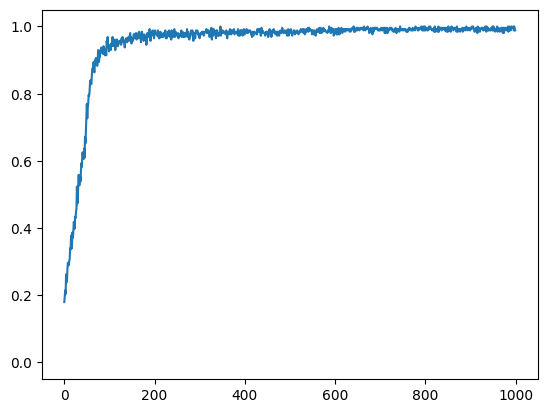

Epoch 1/500
48/48 [==============================] - 1s 10ms/step - loss: 0.5060 - val_loss: 0.9492
Epoch 2/500
48/48 [==============================] - 0s 7ms/step - loss: 0.2522 - val_loss: 0.8963
Epoch 3/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1718 - val_loss: 0.8473
Epoch 4/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1296 - val_loss: 0.7474
Epoch 5/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1042 - val_loss: 0.6502
Epoch 6/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1039 - val_loss: 0.5666
Epoch 7/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0956 - val_loss: 0.4790
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0812 - val_loss: 0.3613
Epoch 9/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0869 - val_loss: 0.3139
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0816 - val_loss: 0.2697
Epoch 11

48/48 [==============================] - 0s 7ms/step - loss: 0.0283 - val_loss: 0.0547
Epoch 84/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0304 - val_loss: 0.1667
Epoch 85/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0424 - val_loss: 0.1110
Epoch 86/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0384 - val_loss: 0.0765
Epoch 87/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0299 - val_loss: 0.2460
Epoch 88/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0352 - val_loss: 0.2216
Epoch 89/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0367 - val_loss: 0.2498
Epoch 90/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0349 - val_loss: 0.0739
Epoch 91/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0351 - val_loss: 0.0466
Epoch 92/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0339 - val_loss: 0.2925
Epoch 93/500


48/48 [==============================] - 0s 8ms/step - loss: 0.0273 - val_loss: 0.0737
Epoch 246/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0274 - val_loss: 0.0302
Epoch 247/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0217 - val_loss: 0.0532
Epoch 248/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0670
Epoch 249/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0267 - val_loss: 0.0298
Epoch 250/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0216 - val_loss: 0.0408
Epoch 251/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0217 - val_loss: 0.0451
Epoch 252/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0244 - val_loss: 0.0406
Epoch 253/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0293 - val_loss: 0.0521
Epoch 254/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0281 - val_loss: 0.0566
Epoc

48/48 [==============================] - 0s 7ms/step - loss: 0.0190 - val_loss: 0.0632
Epoch 408/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0167 - val_loss: 0.0811
Epoch 409/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0164 - val_loss: 0.0502
Epoch 410/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0278 - val_loss: 0.0458
Epoch 411/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0175 - val_loss: 0.0515
Epoch 412/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0167 - val_loss: 0.0573
Epoch 413/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0241 - val_loss: 0.0422
Epoch 414/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0501
Epoch 415/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0229 - val_loss: 0.1389
Epoch 416/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0173 - val_loss: 0.0618
Epoc

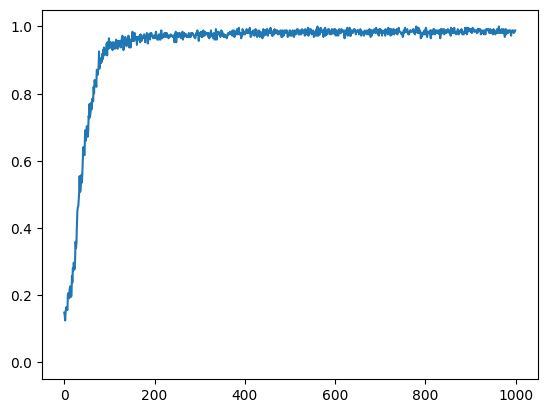

Epoch 1/500
48/48 [==============================] - 1s 10ms/step - loss: 0.8016 - val_loss: nan
Epoch 2/500
48/48 [==============================] - 0s 8ms/step - loss: 0.3162 - val_loss: nan
Epoch 3/500
48/48 [==============================] - 0s 8ms/step - loss: 0.2161 - val_loss: nan
Epoch 4/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1388 - val_loss: nan
Epoch 5/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0994 - val_loss: nan
Epoch 6/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1085 - val_loss: nan
Epoch 7/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0874 - val_loss: nan
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0854 - val_loss: nan
Epoch 9/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0786 - val_loss: nan
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0868 - val_loss: nan
Epoch 11/500
48/48 [==================

Epoch 169/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0282 - val_loss: nan
Epoch 170/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0350 - val_loss: nan
Epoch 171/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0343 - val_loss: nan
Epoch 172/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0269 - val_loss: nan
Epoch 173/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0257 - val_loss: nan
Epoch 174/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: nan
Epoch 175/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0315 - val_loss: nan
Epoch 176/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0217 - val_loss: nan
Epoch 177/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0344 - val_loss: nan
Epoch 178/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0330 - val_loss: nan
Epoch 179/500
48/48 

48/48 [==============================] - 0s 7ms/step - loss: 0.0242 - val_loss: nan
Epoch 336/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0253 - val_loss: nan
Epoch 337/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0161 - val_loss: nan
Epoch 338/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0159 - val_loss: nan
Epoch 339/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0221 - val_loss: nan
Epoch 340/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0210 - val_loss: nan
Epoch 341/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0243 - val_loss: nan
Epoch 342/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0274 - val_loss: nan
Epoch 343/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0211 - val_loss: nan
Epoch 344/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0238 - val_loss: nan
Epoch 345/500
48/48 [=============

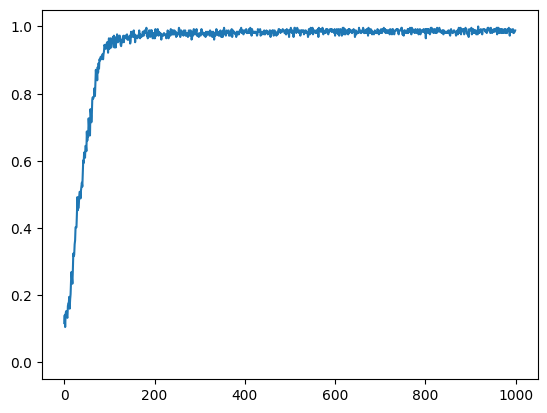

Epoch 1/500
48/48 [==============================] - 1s 9ms/step - loss: 0.8626 - val_loss: 0.9882
Epoch 2/500
48/48 [==============================] - 0s 7ms/step - loss: 0.4288 - val_loss: 0.9830
Epoch 3/500
48/48 [==============================] - 0s 8ms/step - loss: 0.2386 - val_loss: 0.9717
Epoch 4/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1664 - val_loss: 0.8928
Epoch 5/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1148 - val_loss: 0.7327
Epoch 6/500
48/48 [==============================] - 0s 8ms/step - loss: 0.1126 - val_loss: 0.5783
Epoch 7/500
48/48 [==============================] - 0s 7ms/step - loss: 0.1054 - val_loss: 0.3998
Epoch 8/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0948 - val_loss: 0.2986
Epoch 9/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0797 - val_loss: 0.2749
Epoch 10/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0752 - val_loss: 0.2032
Epoch 11/

48/48 [==============================] - 0s 7ms/step - loss: 0.0337 - val_loss: 0.0246
Epoch 84/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0357 - val_loss: 0.0214
Epoch 85/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0374 - val_loss: 0.0402
Epoch 86/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0365 - val_loss: 0.0317
Epoch 87/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0339 - val_loss: 0.0343
Epoch 88/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0370 - val_loss: 0.0419
Epoch 89/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0343 - val_loss: 0.0303
Epoch 90/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0348 - val_loss: 0.0439
Epoch 91/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0320 - val_loss: 0.0406
Epoch 92/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0392 - val_loss: 0.0373
Epoch 93/500


48/48 [==============================] - 0s 7ms/step - loss: 0.0227 - val_loss: 0.0336
Epoch 246/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0208 - val_loss: 0.0384
Epoch 247/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0247 - val_loss: 0.0579
Epoch 248/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0254 - val_loss: 0.0497
Epoch 249/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0244 - val_loss: 0.0331
Epoch 250/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0214 - val_loss: 0.0426
Epoch 251/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0239 - val_loss: 0.0286
Epoch 252/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0294
Epoch 253/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0276 - val_loss: 0.0240
Epoch 254/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0223 - val_loss: 0.0403
Epoc

48/48 [==============================] - 0s 7ms/step - loss: 0.0203 - val_loss: 0.0387
Epoch 408/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0194 - val_loss: 0.0333
Epoch 409/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0195 - val_loss: 0.0884
Epoch 410/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0185 - val_loss: 0.0453
Epoch 411/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0194 - val_loss: 0.0412
Epoch 412/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0175 - val_loss: 0.0355
Epoch 413/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0161 - val_loss: 0.0388
Epoch 414/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0235 - val_loss: 0.0693
Epoch 415/500
48/48 [==============================] - 0s 8ms/step - loss: 0.0209 - val_loss: 0.0789
Epoch 416/500
48/48 [==============================] - 0s 7ms/step - loss: 0.0234 - val_loss: 0.0657
Epoc

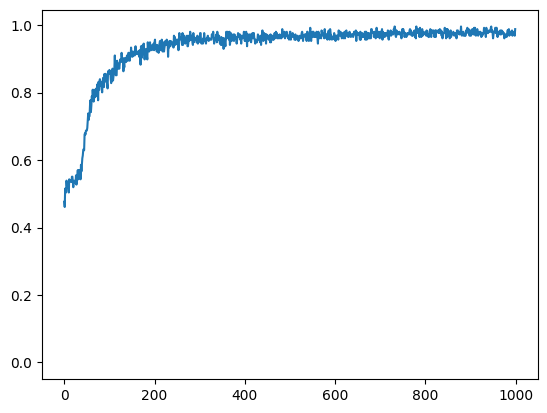

average accuracy : 0.8451820728291315


In [4]:
# 10fold validation 수행여부
bTenFoldValidation = True
if not bTenFoldValidation:  # 학습 & 테스트를 1회만 수행하는 경우
    # 데이터 분할
    [x_train, x_val, x_test, y_train, y_val, y_test] = exp.split_data(x_norm, y, test_ratio=0.0, val_ratio=0.2)

    # 모델 불러오기 & 컴파일
    g = deep.encoder(x.shape[1:])
        
    g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

    hist = g.fit(x_train, y_train, epochs=500, batch_size = 16, validation_data=(x_val, y_val))
    
    g.trainable=False
    m = deep.final_model(x.shape[1:], g, (1296,))
    
    m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

    # 학습시 사용하는 옵션
    train_options = exp.TrainParams(m, epochs=1000, batch_size_per_class=64)

    # 학습
    result = exp.train_batches_with_random_selection(train_options, x_train, y_train, x_val, y_val)

    # 테스트
    if(x_test.shape[0] > 0):
        test_acc_tmp = np.sum(np.argmax(np.squeeze(result.model.predict(x_val)), -1) == y_val) / y_val.shape[0]
        print(f'test_acc:{test_acc_tmp}')
    # 결과 출력

    plt.plot(result.train_acc)
    plt.plot(result.val_acc)
    plt.show()

else:  # N fold Validation
    idx = np.array(range(n_row))
    np.random.shuffle(idx)  # 데이터 인덱스 섞기

    N = 10
    total = 0
    nClass = 4
    cm_sum = np.zeros([nClass, nClass])
    for i in range(N):
        # Train/Test 데이터 분할
        [x_train, x_test, y_train, y_test] = exp.split_data_for_N_fold_validation(x_norm, y, fold=N, idx=i)

        # 모델 불러오기 & 컴파일
        g = deep.encoder(x.shape[1:])
        
        g.compile(loss=tfa.losses.TripletSemiHardLoss(), optimizer=Adam(learning_rate=0.0001))

        # 학습
        hist = g.fit(x_train, y_train, epochs=500, batch_size = 16, validation_data=(x_test, y_test), verbose=0)
        g.trainable=False
        m = deep.autoencoder_test(x.shape[1:], g, (1296,))
        
        m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
        
        # 학습시 사용하는 옵션
        train_options = exp.TrainParams(m, epochs=1000, batch_size_per_class=64)
        
        result = exp.train_batches_with_random_selection(train_options, x_train, y_train, bVerbose=False)
        
        # 테스트
        o = np.argmax(np.squeeze(result.model.predict(x_test)), -1)
        test_acc_tmp = np.sum(o == y_test) / y_test.shape[0]
        cm = np.zeros([nClass, nClass])
        for j in range(y_test.shape[0]):
            cm[int(y_test[j]), int(o[j])] += 1  #Confusion Matrix 계산

        cm_sum += cm
        
        # 결과 출력
        print(f'{i}/{N}\t test_acc:{test_acc_tmp}')
        plt.plot(result.train_acc)
        plt.plot(result.val_acc)
        plt.show()
        total = total + test_acc_tmp

ave = total/N
print(f'average accuracy : {ave}')

In [2]:
# 텍스트 파일에서 Confusion matrix 불러오기
loaded_cm = np.loadtxt('confusion_matrix.txt', dtype=int, delimiter='\t')
print(loaded_cm)

[[191   3   2   3]
 [  2 173   1  41]
 [  1   0 214   3]
 [  2  67   0 143]]


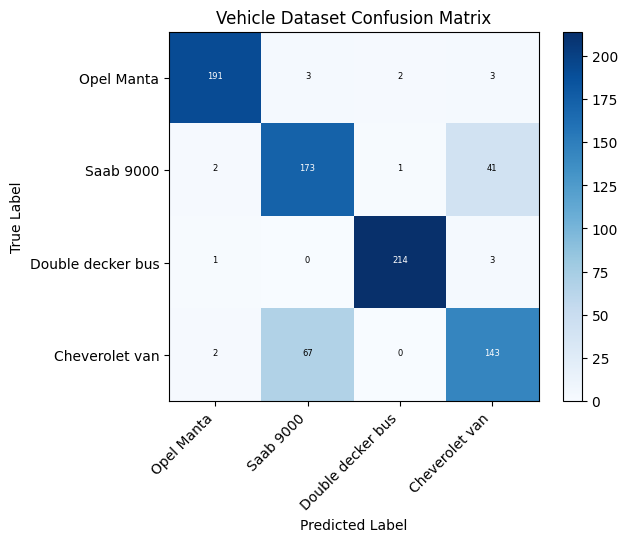

In [3]:
conf_matrix = loaded_cm

# 시각화
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Vehicle Dataset Confusion Matrix')
plt.colorbar()

classes = ['Opel Manta', 'Saab 9000', 'Double decker bus', 'Cheverolet van']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, ha='right')
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 각 셀에 숫자 표시
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(int(conf_matrix[i, j])),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black",
                 fontsize=6)  # 숫자의 글자 크기 조절

plt.show()
